# Aprendizagem Automática - Student Sucess Uevora

- Teachers: Teresa Gonçalves, Luis Rato
- Made by: Miguel de Carvalho (43108), João Pereira(42864)

## Add necessary imports for our code

In [17]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn import metrics

## Funcion that reads and parse our data

In [18]:
def data_treatment(file):
    data = pd.read_csv(file, header=0)
    if(file=='train.csv'):
        data.drop('Id',axis=1,inplace=True) 
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)
        y_data = data[['Failure']].copy()
        data.drop('Failure',axis=1,inplace=True)
        x_data = data.copy()
        return x_data,y_data
    else:
        save = data['Id'].copy()
        data.drop('Id',axis=1,inplace=True) 
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)
        return data,save

x_train,y_train = data_treatment('train.csv')
x_test,id_column = data_treatment('test.csv')

## Testing with different Models 

### GradientBoostingClassifier 

The first model we chose was GradientBoostingClassifier. We started by running it without any parameters set by us and just stick with the default ones. Then we start by doing some tests and representing that with some plots, just to be more clearly the difference between them (supervised learning).

In [19]:
from sklearn.ensemble import GradientBoostingClassifier 

#### Choosing the best Parameters

We will test each parameter and try to get the best of each one

##### Parameter "learning_rate"

learning_rate shrinks the contribution of each tree by learning_rate.

learning_rate: 0.01, train_accuracy: 0.9214517876489707 ,test_accuracy: 0.914409518213866
learning_rate: 0.11, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.9458254994124559
learning_rate: 0.21000000000000002, train_accuracy: 0.9745395449620802 ,test_accuracy: 0.9496210340775558
learning_rate: 0.31000000000000005, train_accuracy: 0.9821235102925244 ,test_accuracy: 0.9442097532314924
learning_rate: 0.41000000000000003, train_accuracy: 0.9875406283856988 ,test_accuracy: 0.9441950646298473
learning_rate: 0.51, train_accuracy: 0.9891657638136512 ,test_accuracy: 0.9436515863689777
learning_rate: 0.6100000000000001, train_accuracy: 0.9880823401950163 ,test_accuracy: 0.9414776733254995
learning_rate: 0.7100000000000001, train_accuracy: 0.9929577464788732 ,test_accuracy: 0.9371592244418332
learning_rate: 0.81, train_accuracy: 0.9924160346695557 ,test_accuracy: 0.9382696827262045
learning_rate: 0.91, train_accuracy: 0.9934994582881906 ,test_accuracy: 0.9284958871915394
learning_rate: 1.0

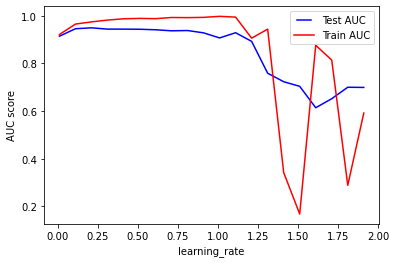

In [20]:
min_learning = 0.01
max_learning = 1
inc_learning = int((max_learning-min_learning)/10)
n_learning = np.arange(min_learning,max_learning+1,0.10)
vali_results = []
train_results = []

for learning in n_learning:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=learning, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"learning_rate: {learning}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_learning, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_learning, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('learning_rate')
plt.show()

##### Parameter "n_estimators"

n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

n_estimators: 1, train_accuracy: 0.7291440953412784 ,test_accuracy: 0.7291421856639249
n_estimators: 20, train_accuracy: 0.918201516793066 ,test_accuracy: 0.9230787309048178
n_estimators: 39, train_accuracy: 0.9420368364030336 ,test_accuracy: 0.9349999999999999
n_estimators: 58, train_accuracy: 0.9490790899241603 ,test_accuracy: 0.9393301997649826
n_estimators: 77, train_accuracy: 0.9577464788732394 ,test_accuracy: 0.9447414806110459
n_estimators: 96, train_accuracy: 0.9604550379198267 ,test_accuracy: 0.9463777908343125
n_estimators: 115, train_accuracy: 0.9626218851570965 ,test_accuracy: 0.9463777908343125
n_estimators: 134, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.945828437132785
n_estimators: 153, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.9463719153936546
n_estimators: 172, train_accuracy: 0.9696641386782232 ,test_accuracy: 0.946906580493537
n_estimators: 191, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9463719153936546


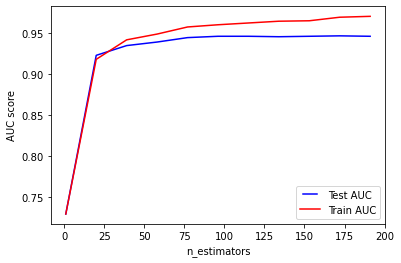

In [21]:
min_estimators = 1
max_estimators = 200
inc_estimators = int((max_estimators-min_estimators)/10)
n_estimators = range(min_estimators,max_estimators+1,inc_estimators)
vali_results = []
train_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator,learning_rate=0.11, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"n_estimators: {estimator}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_estimators, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('n_estimators')
plt.show()

##### Parameter "max_depth"

max_depth indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test errors.

max_depth: 1, train_accuracy: 0.9534127843986999 ,test_accuracy: 0.9414952996474735
max_depth: 2, train_accuracy: 0.9599133261105092 ,test_accuracy: 0.9447473560517039
max_depth: 3, train_accuracy: 0.9658721560130011 ,test_accuracy: 0.946906580493537
max_depth: 4, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.945834312573443
max_depth: 5, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9458225616921269
max_depth: 6, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.9490834312573442
max_depth: 7, train_accuracy: 0.9669555796316359 ,test_accuracy: 0.9490804935370152
max_depth: 8, train_accuracy: 0.9674972914409534 ,test_accuracy: 0.945828437132785
max_depth: 9, train_accuracy: 0.9691224268689057 ,test_accuracy: 0.9474529964747356
max_depth: 10, train_accuracy: 0.9669555796316359 ,test_accuracy: 0.9479994124559343


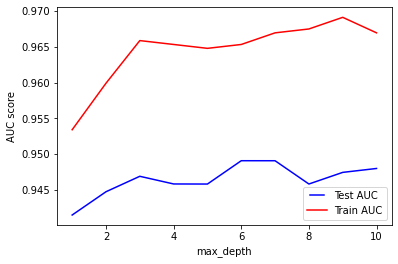

In [22]:
min_depth = 1
max_depth = 10
inc_depth = int((max_depth-min_depth)/10)
n_depth = np.arange(min_depth,max_depth+1,1)
vali_results = []
train_results = []

for depth in n_depth:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=float(depth), min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_depth: {depth}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_depth, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_depth, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_depth')
plt.show()

##### Parameter "min_samples_split"

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

min_samples_split: 0.1, train_accuracy: 0.9994582881906826 ,test_accuracy: 0.9425646298472385
min_samples_split: 0.2, train_accuracy: 0.9978331527627302 ,test_accuracy: 0.9431169212690952
min_samples_split: 0.30000000000000004, train_accuracy: 0.9929577464788732 ,test_accuracy: 0.945822561692127
min_samples_split: 0.4, train_accuracy: 0.985373781148429 ,test_accuracy: 0.9474588719153937
min_samples_split: 0.5, train_accuracy: 0.9788732394366197 ,test_accuracy: 0.9463748531139835
min_samples_split: 0.6, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9441980023501764
min_samples_split: 0.7000000000000001, train_accuracy: 0.9669555796316359 ,test_accuracy: 0.9501645123384254
min_samples_split: 0.8, train_accuracy: 0.9642470205850487 ,test_accuracy: 0.9474471210340777
min_samples_split: 0.9, train_accuracy: 0.9561213434452871 ,test_accuracy: 0.9442068155111633
min_samples_split: 1.0, train_accuracy: 0.9544962080173348 ,test_accuracy: 0.9393243243243244


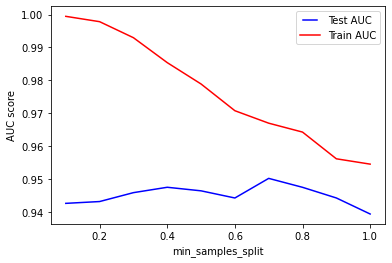

In [23]:
min_samples = 0.1
max_samples = 1.1
n_samples = np.arange(min_samples,max_samples,0.1)
vali_results = []
train_results = []

for samples in n_samples:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=samples, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_split: {samples}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_samples, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_samples, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_split')
plt.show()

##### Parameters "min_samples_leaf"

min_samples_leaf is The minimum number of samples required to be at a leaf node. This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.

min_samples_leaf: 1, train_accuracy: 0.9750812567713976 ,test_accuracy: 0.9463631022326673
min_samples_leaf: 2, train_accuracy: 0.9734561213434453 ,test_accuracy: 0.9469124559341949
min_samples_leaf: 3, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9431198589894242
min_samples_leaf: 4, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9463719153936546
min_samples_leaf: 5, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9452820211515863
min_samples_leaf: 6, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9474529964747356
min_samples_leaf: 7, train_accuracy: 0.9712892741061755 ,test_accuracy: 0.9485370152761459
min_samples_leaf: 8, train_accuracy: 0.9691224268689057 ,test_accuracy: 0.9496298472385429
min_samples_leaf: 9, train_accuracy: 0.9723726977248104 ,test_accuracy: 0.9463777908343125


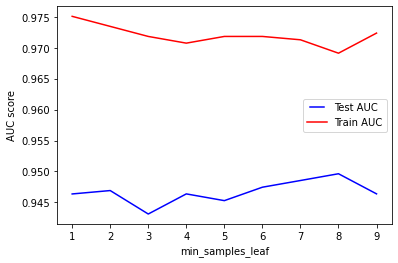

In [24]:
min_leaf = 1
max_leaf = 10
n_leafs = np.arange(min_leaf,max_leaf,1)
vali_results = []
train_results = []

for leaf in n_leafs:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=leaf, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_leaf: {leaf}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_leafs, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_leafs, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_leaf')
plt.show()

##### Parameters "max_features"

max_features represents the number of features to consider when looking for the best split.

max_features: 1, train_accuracy: 0.9539544962080173 ,test_accuracy: 0.942035840188014
max_features: 2, train_accuracy: 0.9631635969664138 ,test_accuracy: 0.9452908343125734
max_features: 3, train_accuracy: 0.9669555796316359 ,test_accuracy: 0.9501645123384254
max_features: 4, train_accuracy: 0.9664138678223185 ,test_accuracy: 0.9474559341950647
max_features: 5, train_accuracy: 0.9696641386782232 ,test_accuracy: 0.9447473560517039
max_features: 6, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9474588719153936
max_features: 7, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.946909518213866
max_features: 8, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9479964747356051
max_features: 9, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9479994124559342


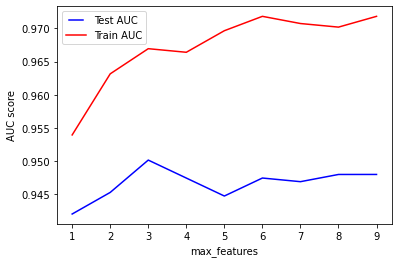

In [25]:
min_features = 1
max_features = 10
n_features = np.arange(min_features,max_features,1)
vali_results = []
train_results = []

for feature in n_features:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=7, max_features=feature)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_features: {feature}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_features, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_features, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_features')
plt.show()

#### Attempts and Results

On our first attempt we didn't set any parameteres, we just sticked with the default ones.

| attempt/parameters 	| n_estimators 	| learning_rate 	| max_depth 	| min_samples_split 	| min_samples_leaf 	| max_features 	| **Accuracy on Kaggle** 	|
|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|
| 1 	| default 	| default 	| default 	| default 	| default 	| default 	| **0.93617** 	|
| 2 	| 39 	| 0.11 	| 3 	| 0.5 	| 1 	| 8 	| **0.94366** 	|

#### Generate File Result

In [31]:
model = GradientBoostingClassifier(n_estimators=39, learning_rate=0.11, max_depth=3, min_samples_split=0.5, min_samples_leaf=1, max_features=8)

model.fit(x_train, y_train.values.ravel())

result = model.predict(x_test)

result = pd.DataFrame(data=result)
result.columns = ['Failure']
result.insert(loc=0,column ='Id',value=id_column)

result.to_csv(r'result.csv', index = False)

### BaggingClassifier

The second model we used was BagginClassifier with GridSearch to get us the best parameters we could use.

In [27]:
from sklearn.ensemble import BaggingClassifier

parameters_B = {
    "n_estimators":np.arange(1,500,50),
    "max_samples":np.arange(1,500,50),
    }

clf = GridSearchCV(BaggingClassifier(), parameters_B,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.939867802585194


#### Results

We got a accuracy of 92.957% on **Kaggle**.

### KNeighborsClassifier

The third model we used was KNeighborsClassifier with GridSearch to get us the best parameters we could use.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

parameters_K = {
    "n_neighbors":np.arange(1,500,50),
    "weights": ["uniform",  "distance"],
    "leaf_size": np.arange(1,1000,50)
}

clf = GridSearchCV(KNeighborsClassifier(), parameters_K,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9246827262044655


#### Results

We got a accuracy of 93.7% on **Kaggle**.

### LogisticRegression

The forth model we used was LogisticRegression with GridSearch to get us the best parameters we could use.

In [29]:
from sklearn.linear_model import LogisticRegression

parameters_L = {
    "C":np.arange(1,701,50),
    "penalty": ["l1","l2"],
    "solver": ["liblinear",],
    "tol": [1e-4],
    "max_iter": np.arange(1000,7001,1000),
    "intercept_scaling":np.arange(1,701,50),
    "multi_class":["auto"],
    }

clf = GridSearchCV(LogisticRegression(), parameters_L,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9425734430082257


#### Results

We got an accuracy of 95.8% on **Kaggle**.

### Conclusion

The **model** that gave us the best accuracy was `LogisticRegression` with **95.8%**

Making this work showed us how the models are important in machine-learning to predict the results, in this example we are trying to predict if a student is going to drop out or not. For the solution to be trustfull:

- We need to understand the data first: merge and spliting the usefull data.

- Choose the best model or strategy based on the data, because some models work better with different types of data.

- Adjusting the model to get the best performance: validating the model, letting us get the best parameters.

- Check if the final model can solve the problem.